In [137]:
!python tools/aer.py data/annotated/cs-uk/csuk.gold finetune/mbert_multilingual_1M-per-lang_finegrained/checkpoint-600/csuk.awesome-align.out

finetune/mbert_multilingual_1M-per-lang_finegrained/checkpoint-600/csuk.awesome-align.out: 10.1% (89.3%/90.6%/987)
F-Measure: 0.899


In [104]:
!python /lnet/troja/work/people/mnovak/word_align/tools/eval.py data/annotated/cs-uk/csuk.gold finetune/mbert_multilingual_1M-per-lang_finegrained/checkpoint-600/csuk.awesome-align.out

AER = 9.71%


In [138]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
from notebook_utils import load_results

In [132]:
results = {
    "multi, TLM+SO": load_results("mbert_multilingual_1M-per-lang_finegrained") + load_results("mbert_multilingual_1M-per-lang_finegrained_continue", 45000),
    "multi, TLM only": load_results("mbert_multilingual_1M-per-lang_finegrained_only_tlm") + load_results("mbert_multilingual_1M-per-lang_finegrained_only_tlm_continue", 45000),
    "multi, TLM only lr2e-4": load_results("mbert_multilingual_1M-per-lang_finegrained_only_tlm_lr2e-4"),
    "multi, All objectives": load_results("mbert_multilingual_1M-per-lang_finegrained_all_objectives"),
}

In [151]:
results["cs-uk, TLM+SO"] = load_results("mbert_full8M_1epoch_finegrained") + load_results("mbert_full8M_1epoch", baseline=None) + load_results("mbert_full8M_2nd_epoch", 440000)

In [152]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import statsmodels.api as sm

(0.0, 20000.0)

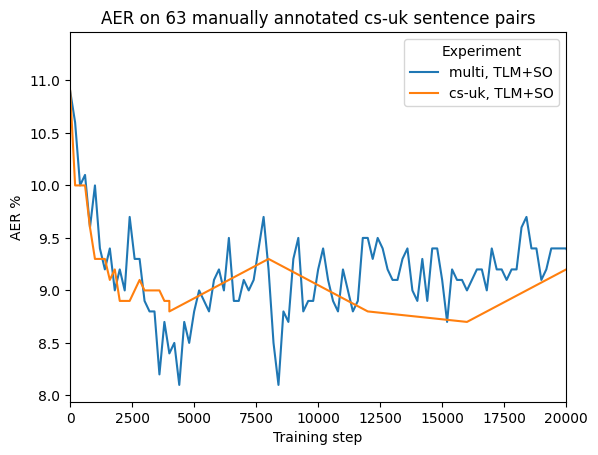

In [153]:
# plot results without any smoothing
subset = {k: results[k] for k in ("multi, TLM+SO", "cs-uk, TLM+SO")}
for label, res in subset.items():
    plt.plot(*zip(*res), label=label)
plt.title("AER on 63 manually annotated cs-uk sentence pairs")
plt.xlabel("Training step")
plt.ylabel("AER %")
plt.legend(title="Experiment")
plt.xlim(0,20000)

(-20000.0, 100000.0)

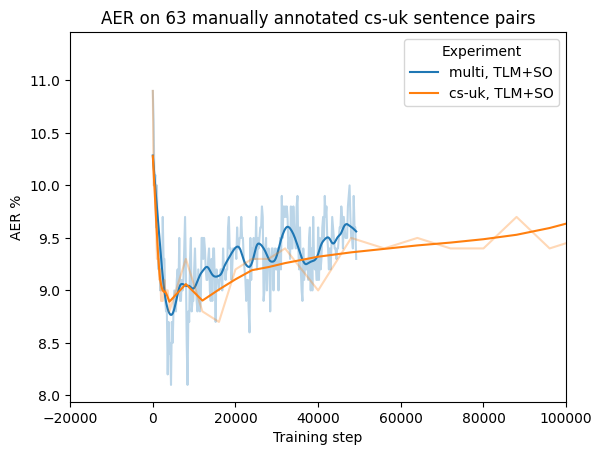

In [161]:
# plot results and smooth using LOWESS

colors = mcolors.TABLEAU_COLORS.keys()
subset = {k: results[k] for k in ("multi, TLM+SO", "cs-uk, TLM+SO")}
for color, (label, res) in zip(colors, subset.items()):
    x, y = zip(*res)
    z = sm.nonparametric.lowess(y, x, frac=0.1)
    plt.plot(x, y, alpha=0.3, color=color)
    plt.plot(z[:,0], z[:,1], label=label, color=color)

plt.title("AER on 63 manually annotated cs-uk sentence pairs")
plt.xlabel("Training step")
plt.ylabel("AER %")
plt.legend(title="Experiment")
plt.xlim(-20000, 100_000)
# plt.xscale("log")

In [148]:
results = {
    "multi, TLM+SO": load_results("mbert_multilingual_1M-per-lang_finegrained"),
    "multi, TLM only->TLM+SO": load_results("mbert_multilingual_1M-per-lang_finegrained_only_tlm_continue_add_so", baseline="mbert_multilingual_1M-per-lang_finegrained_only_tlm_continue/checkpoint-290000"),
    "multi, TLM only->TLM+SO lr1e-5": load_results("mbert_multilingual_1M-per-lang_finegrained_only_tlm_continue_add_so_lr1e-5", baseline="mbert_multilingual_1M-per-lang_finegrained_only_tlm_continue/checkpoint-290000"),
    "multi, TLM only->TLM+SO lr5e-6": load_results("mbert_multilingual_1M-per-lang_finegrained_only_tlm_continue_add_so_lr5e-6", baseline="mbert_multilingual_1M-per-lang_finegrained_only_tlm_continue/checkpoint-290000"),
}

(0.0, 20000.0)

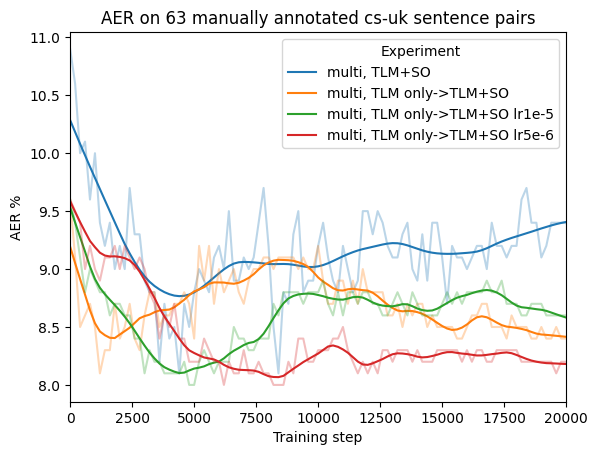

In [157]:
# plot results without any smoothing
# subset = {k: results[k] for k in ("multi, TLM only->TLM+SO","")}
subset =  {k: results[k] for k in results.keys() if k.startswith("multi")}
for color, (label, res) in zip(colors, subset.items()):
    x, y = zip(*res)
    z = sm.nonparametric.lowess(y, x, frac=0.1)
    plt.plot(x, y, alpha=0.3, color=color)
    plt.plot(z[:,0], z[:,1], label=label, color=color)

plt.title("AER on 63 manually annotated cs-uk sentence pairs")
plt.xlabel("Training step")
plt.ylabel("AER %")
plt.legend(title="Experiment")
plt.xlim(0,20000)